# Documents Analysis with Gensim Doc2Vec

## 1. Import Libraries

In [6]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.utils import simple_preprocess
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from twitter import TwitterAPI

## Example #1: 20 news groups

### Data

In [7]:
news = fetch_20newsgroups(categories=['comp.graphics','sci.med','soc.religion.christian'])
data = news.data
target = news.target
target_names = news.target_names

### Preprocessing

In [9]:
train_corpus = []
for i in range(len(data)):
    tokens = simple_preprocess(data[i])
    train_corpus.append(TaggedDocument(tokens, [target[i]]))

### Model

In [10]:
model = Doc2Vec(vector_size=50, min_count=2, epochs=40)
model.build_vocab(train_corpus)
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

### Evaluation

In [11]:
vectors = [model.infer_vector(i.words) for i in train_corpus]
pca = PCA(2)
vectors_2d = pca.fit_transform(vectors)

comp     = [vectors_2d[i].tolist() for i in range(len(vectors_2d)) if target[i] == 0]
med      = [vectors_2d[i].tolist() for i in range(len(vectors_2d)) if target[i] == 1]
religion = [vectors_2d[i].tolist() for i in range(len(vectors_2d)) if target[i] == 2]

In [15]:
tsne = TSNE(2)
vectors_2d = tsne.fit_transform(vectors)

comp     = [vectors_2d[i].tolist() for i in range(len(vectors_2d)) if target[i] == 0]
med      = [vectors_2d[i].tolist() for i in range(len(vectors_2d)) if target[i] == 1]
religion = [vectors_2d[i].tolist() for i in range(len(vectors_2d)) if target[i] == 2]

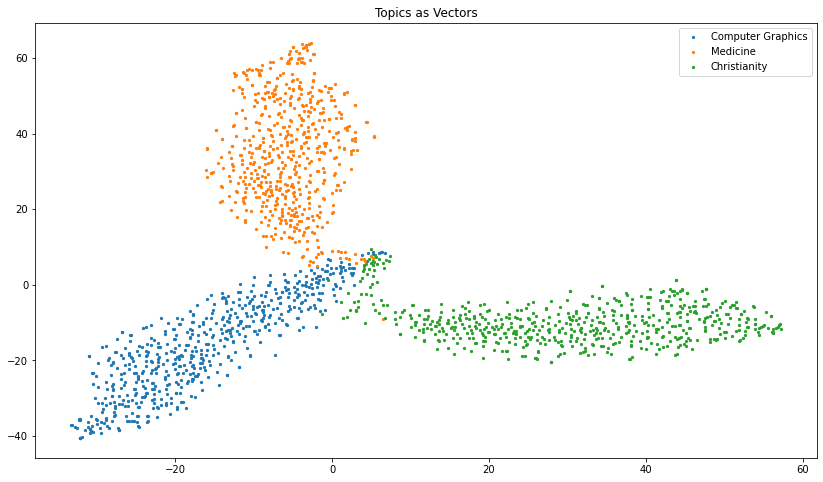

In [16]:
plt.figure(figsize=(14,8))
plt.scatter([i[0] for i in comp], [i[1] for i in comp], s=5, label='Computer Graphics')
plt.scatter([i[0] for i in med], [i[1] for i in med], s=5, label='Medicine')
plt.scatter([i[0] for i in religion], [i[1] for i in religion], s=5, label='Christianity')
plt.title('Topics as Vectors')
plt.legend()
plt.show()

In [750]:
print(data[700])

From: rob@rjck.UUCP (Robert J.C. Kyanko)
Subject: Re: Weitek P9000 ?
Distribution: world
Organization: Neptune Software Inc
Lines: 23

abraxis@iastate.edu writes in article <abraxis.734340159@class1.iastate.edu>:
> 
> Anyone know about the Weitek P9000 graphics chip?
> Micron is selling it with their systems They rank them at 50 winmarks...
> Any info would help...
> thanks.

It's supposedly a high-performance chip based upon workstation graphics
accelerators.  It's quite fast (I have 7), but as usual with new boards/chips
the drivers are buggy for Windows.  As far as Winmarks go, it depends upon
the version.  I think I got 42M winmarks with version 3.11.  2.5 yielded the
50+ number.  I've also benchmarked this with Wintach at over 65 (from memory
as well).

As far as the low-level stuff goes, it looks pretty nice.  It's got this
quadrilateral fill command that requires just the four points.

It's very fast, but beware of buggy drivers, and otherwise no non-windows
support.

--
I am no

In [756]:
test = simple_preprocess(data[500])
test_vector = model.infer_vector(test)
for i in model.dv.most_similar(positive=[test_vector]):
    print(f'{target_names[i[0]]}, {i[1]:.3f}')

comp.graphics, 0.852
sci.med, 0.589
soc.religion.christian, 0.524


In [757]:
model.dv.cosine_similarities(test_vector, vectors).argsort()[::-1][:10]

array([ 500, 1194, 1105, 1204,  537,  469, 1509,  604, 1322,  922])

## Example #2: Tweets

### Data

In [17]:
t = TwitterAPI()
elonmusk = t.timeline('44196397', max_results=100)
billgates = t.timeline('50393960', max_results=100)
jockowillink = t.timeline('3320010078', max_results=100)

You're using Twitter API version 2


In [18]:
elonmusk_tweets = [i['text'] for i in elonmusk['data']]
billgates_tweets = [i['text'] for i in billgates['data']]
jockowillink_tweets = [i['text'] for i in jockowillink['data']]

In [19]:
tweets = elonmusk_tweets + billgates_tweets + jockowillink_tweets
labels = [0]*len(elonmusk_tweets) + [1]*len(billgates_tweets) + [2]*len(jockowillink_tweets)
label_names = {0: 'Elon Musk', 1: 'Bill Gates', 2: 'Jocko Willink'}

### Preprocessing

In [21]:
train_corpus = []
for i in range(len(tweets)):
    tokens = simple_preprocess(tweets[i])
    train_corpus.append(TaggedDocument(tokens, [labels[i]]))

### Model

In [22]:
model = Doc2Vec(vector_size=60, min_count=2, epochs=40)
model.build_vocab(train_corpus)
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

### Evaluation

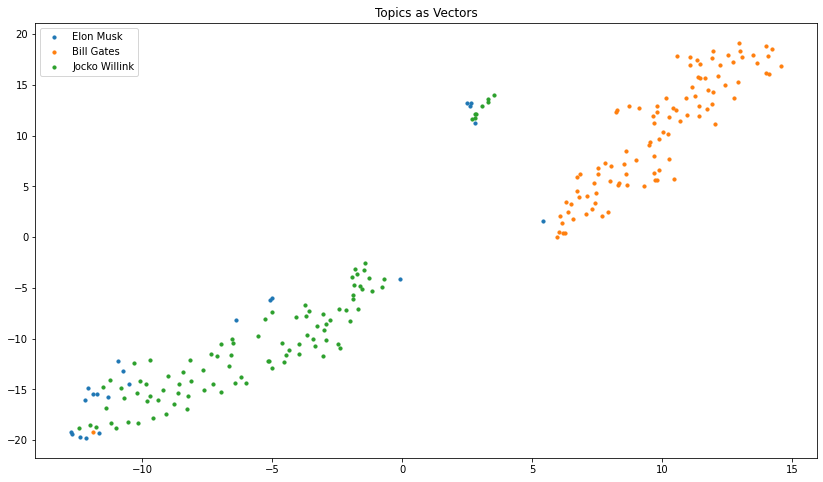

In [30]:
vectors = [model.infer_vector(i.words) for i in train_corpus]
tsne = TSNE(2)
vectors_2d = tsne.fit_transform(vectors)

plt.figure(figsize=(14,8))
plt.scatter(vectors_2d[:22, 0], vectors_2d[:22, 1], s=10, label='Elon Musk')
plt.scatter(vectors_2d[22:122, 0], vectors_2d[22:122, 1], s=10, label='Bill Gates')
plt.scatter(vectors_2d[122:222, 0], vectors_2d[122:222, 1], s=10, label='Jocko Willink')
plt.title('Topics as Vectors')
plt.legend()
plt.show()

In [794]:
test = simple_preprocess('AI')
test_vector = model.infer_vector(test)
for i in model.dv.most_similar(positive=[test_vector]):
    print(f'{label_names[i[0]]}, {i[1]:.3f}')

Elon Musk, 0.986
Jocko Willink, 0.928
Bill Gates, 0.778


In [795]:
model.dv.cosine_similarities(test_vector, vectors).argsort()[::-1][:10]

array([ 4,  1,  6, 19, 47, 16,  8, 52, 20, 43])

### Misc

In [ ]:
def distance(x: list, y: list) -> float:
    '''
    Compute distance between two vectors:

    >>> distance([1, 2],[1, -3])
    5.0
    '''
    return sum([(i-j)**2 for i, j in zip(x, y)])**(1/2)


def cosine(x: list, y: list) -> float:
    '''
    Compute cosine similarity between two vectors:

    >>> cosine([0, 1], [1, 0])
    0.0
    '''
    dot = sum([i*j for i,j in zip(x,y)])
    mag_x = sum([i**2 for i in x])**(1/2)
    mag_y = sum([i**2 for i in y])**(1/2)    
    return dot / (mag_x * mag_y)